In [8]:
from os.path import dirname, join as pjoin
import scipy.io as sio
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the contents of the MATLAB file
mat_contents = sio.loadmat("train_32x32.mat")

# Extract the image data (X) and labels (y)
X = np.transpose(mat_contents['X'], (3, 0, 1, 2))
Y = mat_contents['y'][:,0]

np.random.seed(42)
sampleindices = []

for d in range(1,11):
    indices = np.where(Y == d)[0]
    sampleindices.extend(np.random.choice(indices, size = 2500, replace = False))

sampleindices = np.array(sampleindices)
X = X[sampleindices]
Y = Y[sampleindices]



Each data point is an image which is a 3-D matrix representing RBG image. Since all are independent features we are converting this into 1-D array of length 32x32x3.

In [9]:
# Reshape each image to a one-dimensional array
X_flat = X.reshape(X.shape[0], -1)
print("Shape of X:", X_flat.shape)

Shape of X: (25000, 3072)


This is the general way for calculating the eigen vectors for the covariance matrix but this takes so much computation time without inbuilt GPU integration. That's why we are using the PCA package to calculate the eigen vectors.

In [10]:
# X_cov = np.cov(X_flat)
# eigenvalues, eigenvectors = LA.eig(X_cov)

<div style="text-align: center;">
    <h1>Question 1(a)</h1>
</div>
Perform PCA on SVHN dataset.Find how many top eigenvectors are required to keep the proportion of variance above 0.9 .Plot PoV against number of eigenvectors.

In [11]:
#perform pca
pca = PCA()
X_pca = pca.fit_transform(X_flat)
eigen_vectors = pca.components_

no of components needed to keep POV above 0.9 is  27


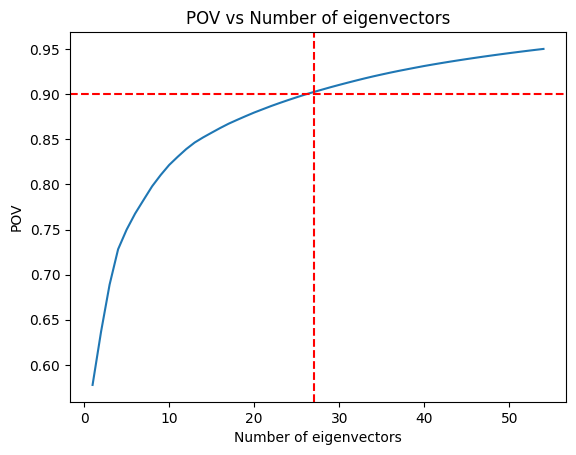

In [12]:
cum_var_ratio = 0
num_components = 0
cum_sum = []

#find the number of components needed to keep POV above 0.9
# for graph we are taking upto 0.95 because it is not visible in graph if we take upto 1
for i in pca.explained_variance_ratio_:
    cum_var_ratio += i
    if cum_var_ratio < 0.9: num_components = num_components+1
    cum_sum.append(cum_var_ratio)
    #comment the below line if you want to see graph for POV upto 1
    if cum_var_ratio > 0.95: break
    
num_components = num_components+1
print("no of components needed to keep POV above 0.9 is " ,num_components)

plt.plot(np.arange(1, len(cum_sum) + 1), cum_sum)
plt.xlabel('Number of eigenvectors')
plt.ylabel('POV')
plt.title('POV vs Number of eigenvectors')
#add line to find where POV is 0.9 show projection of this point on x axis
plt.axhline(y=0.9, color='r', linestyle="dashed")
plt.axvline(x=num_components, color='r', linestyle="dashed")
plt.show()

<div style="text-align: center;">
    <h1>Question 1(b)</h1>
</div>
Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one from each class)using top 10 eigenvectors.

In [13]:
#perform pca with 10 components
pca10 = PCA(n_components=10)
X_pca10 = pca10.fit_transform(X_flat)


<div style="text-align: center;">
    <h3>Visualization</h3>
</div>
Here we are plotting a bar graph of Features vs their Magnitudes on the left side and the projection of data on the components on the right side.

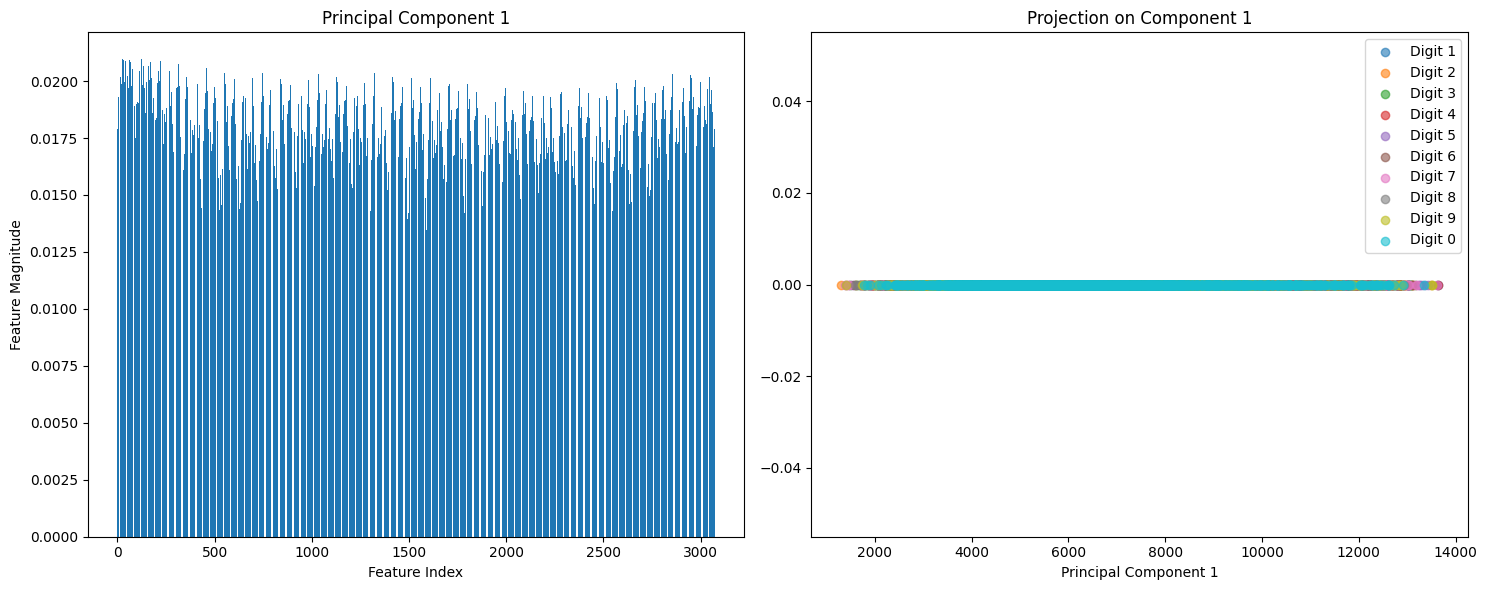

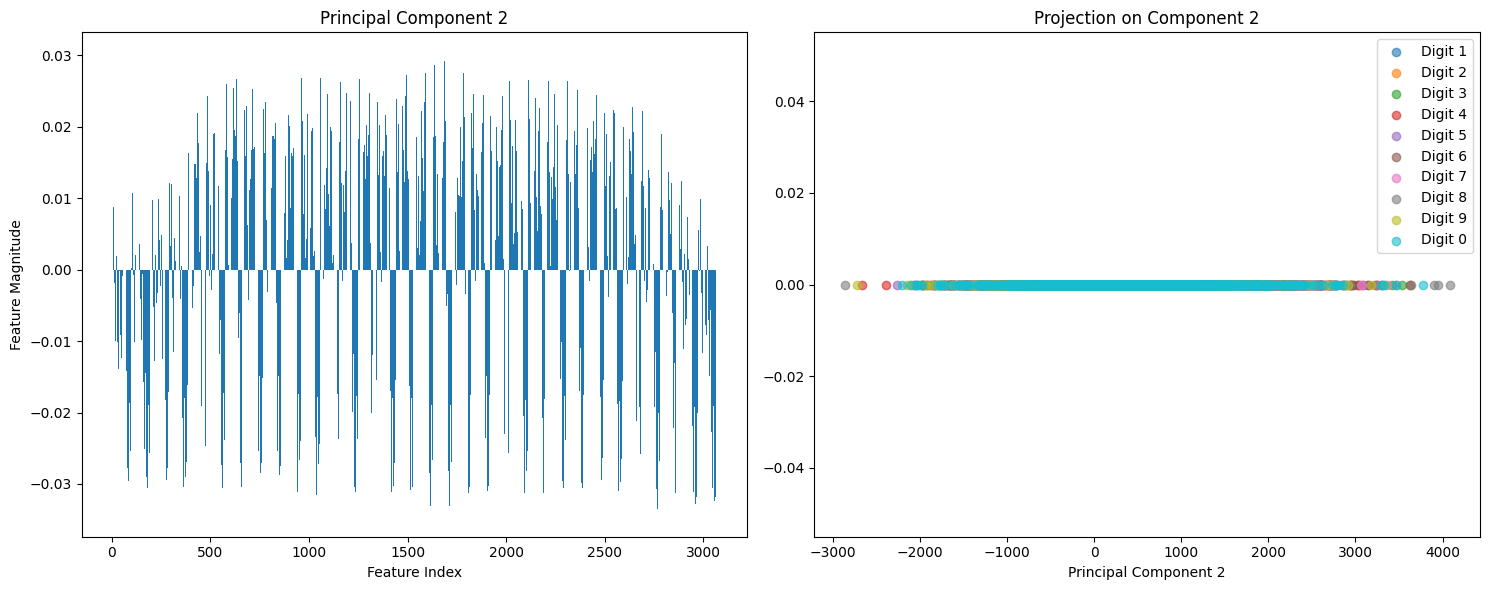

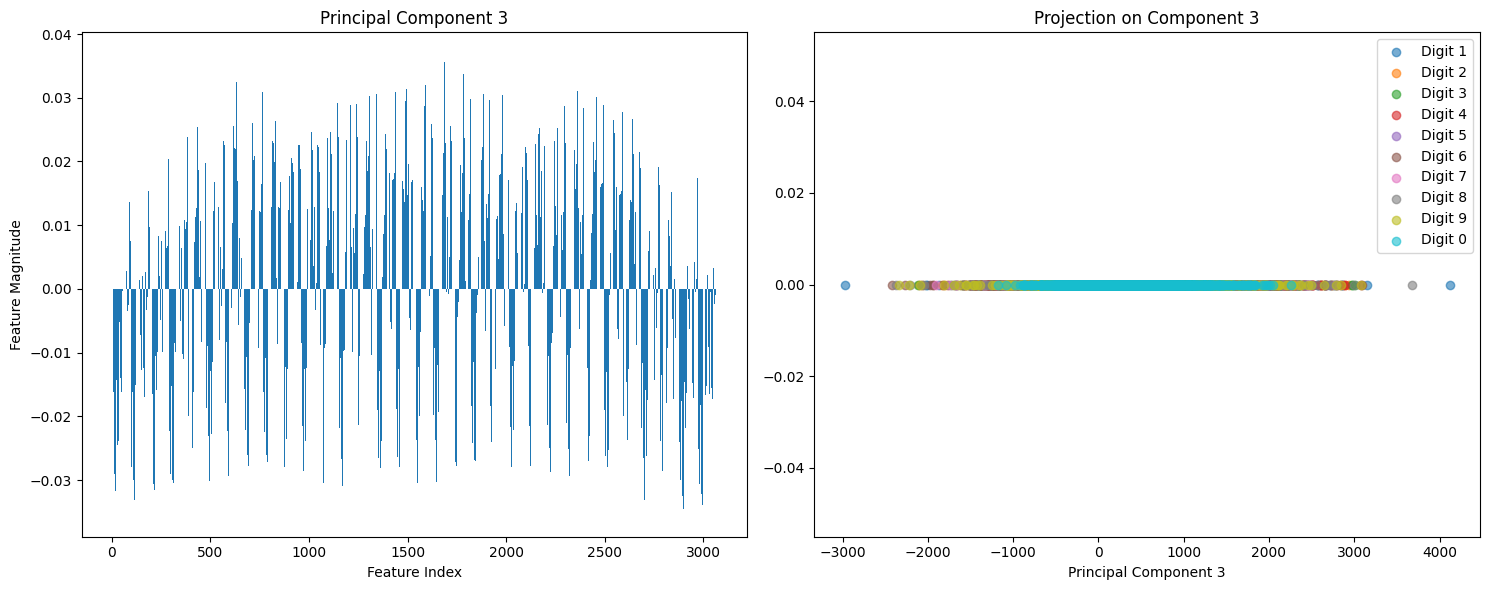

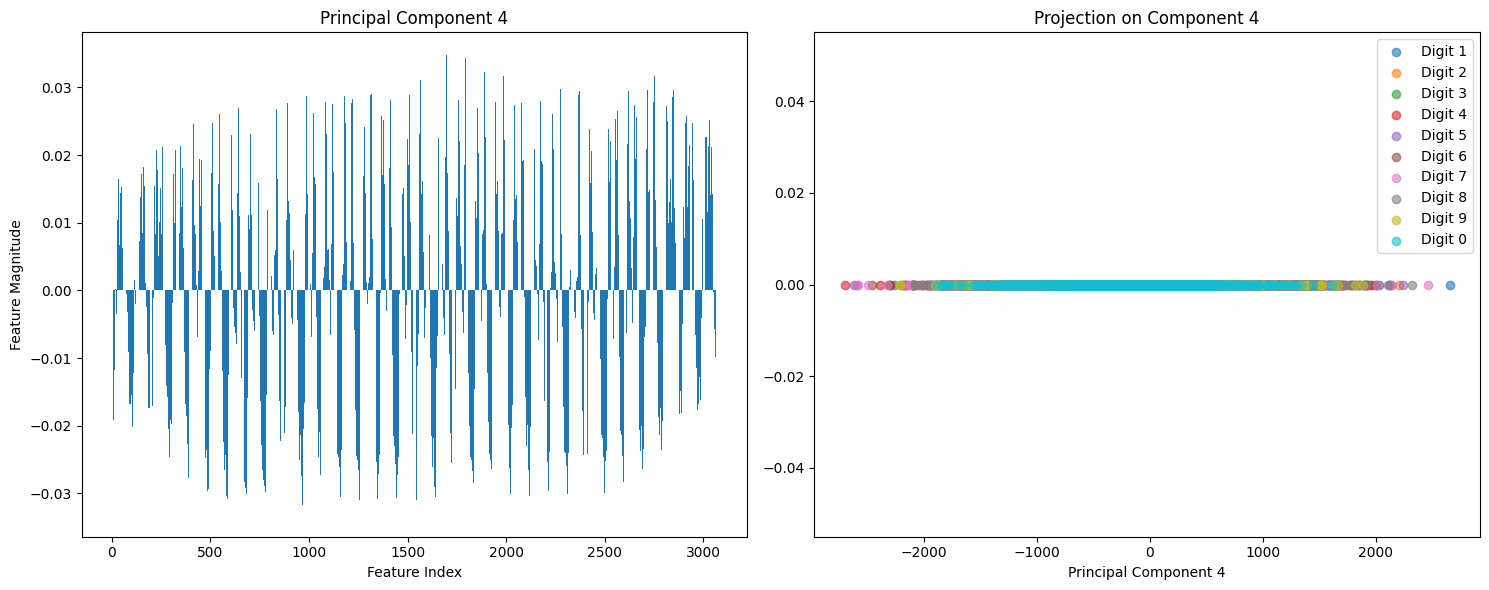

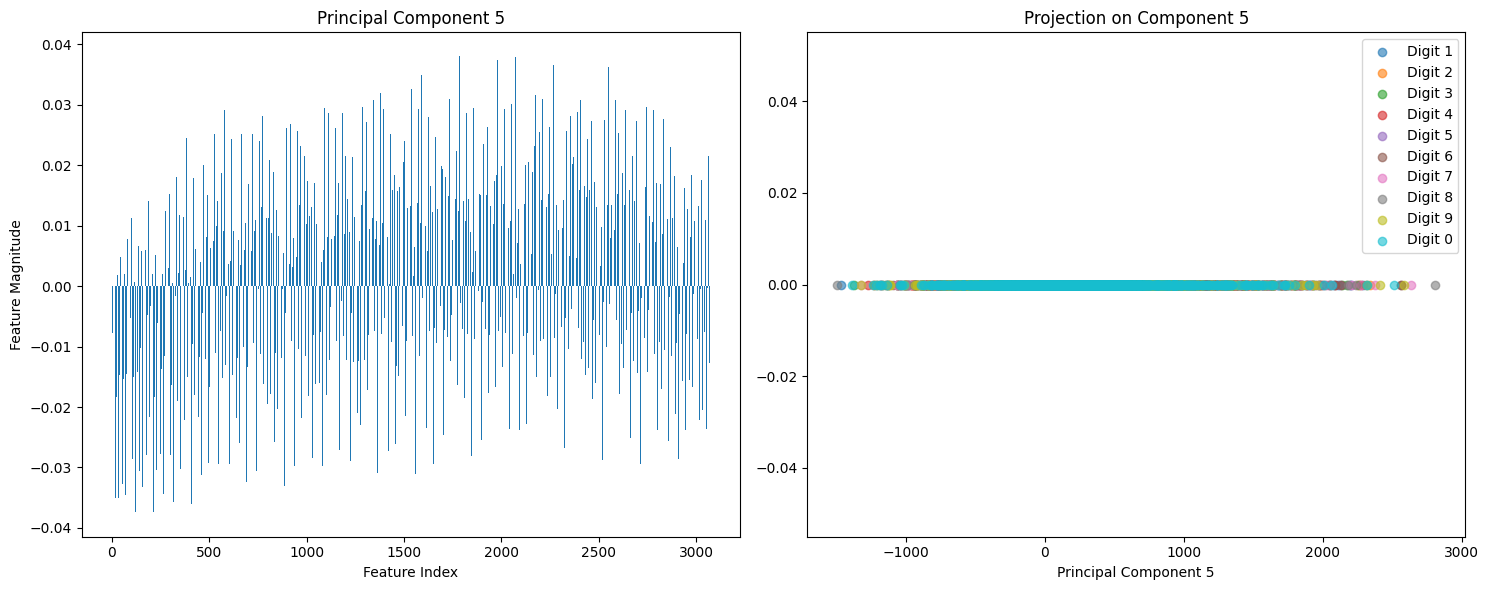

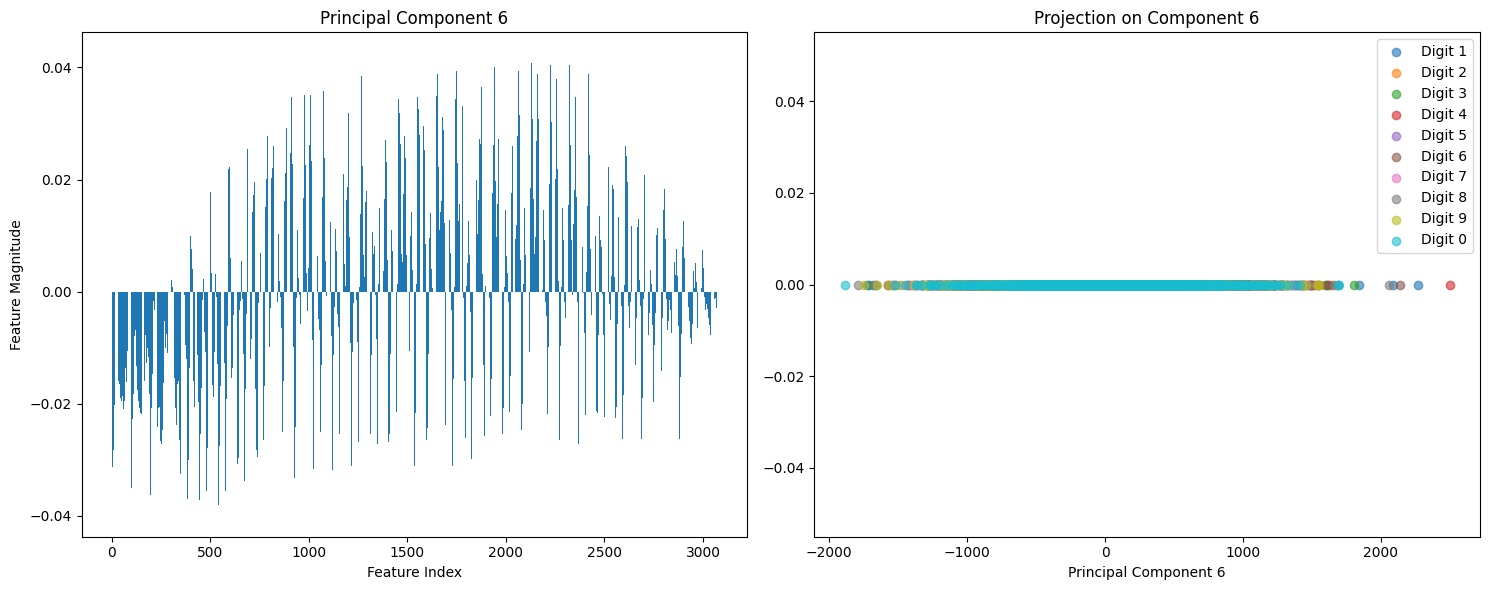

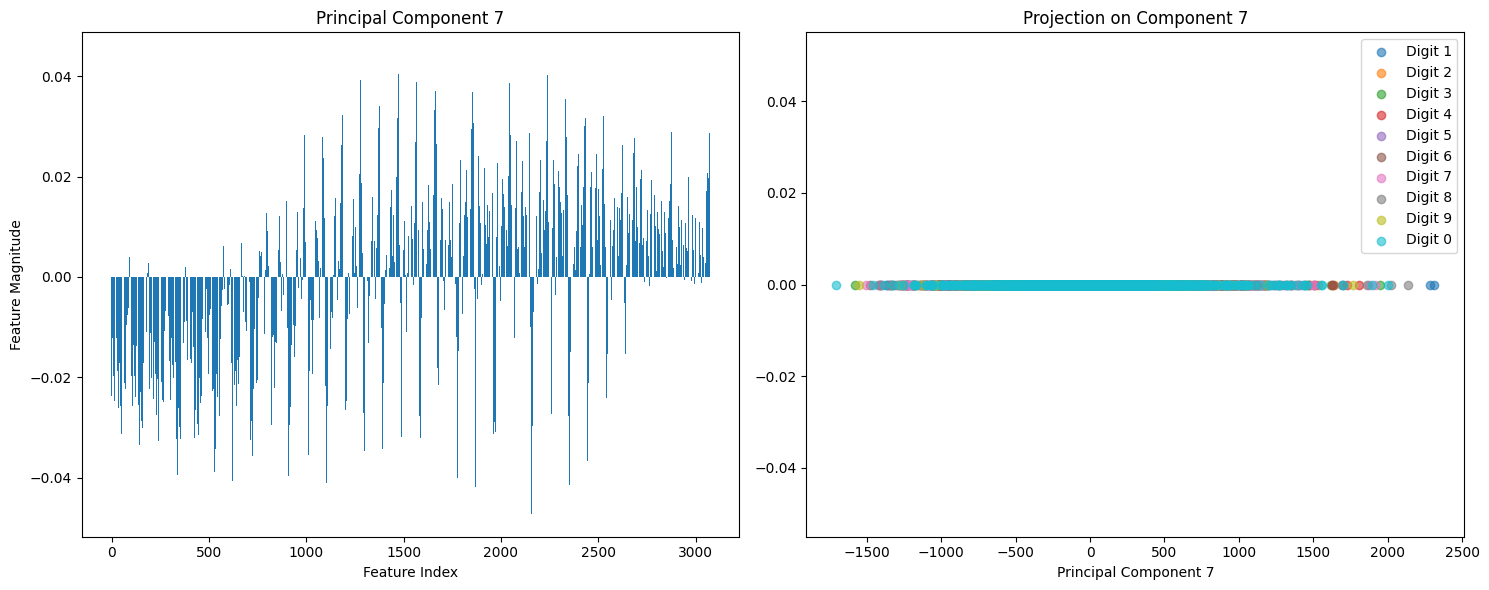

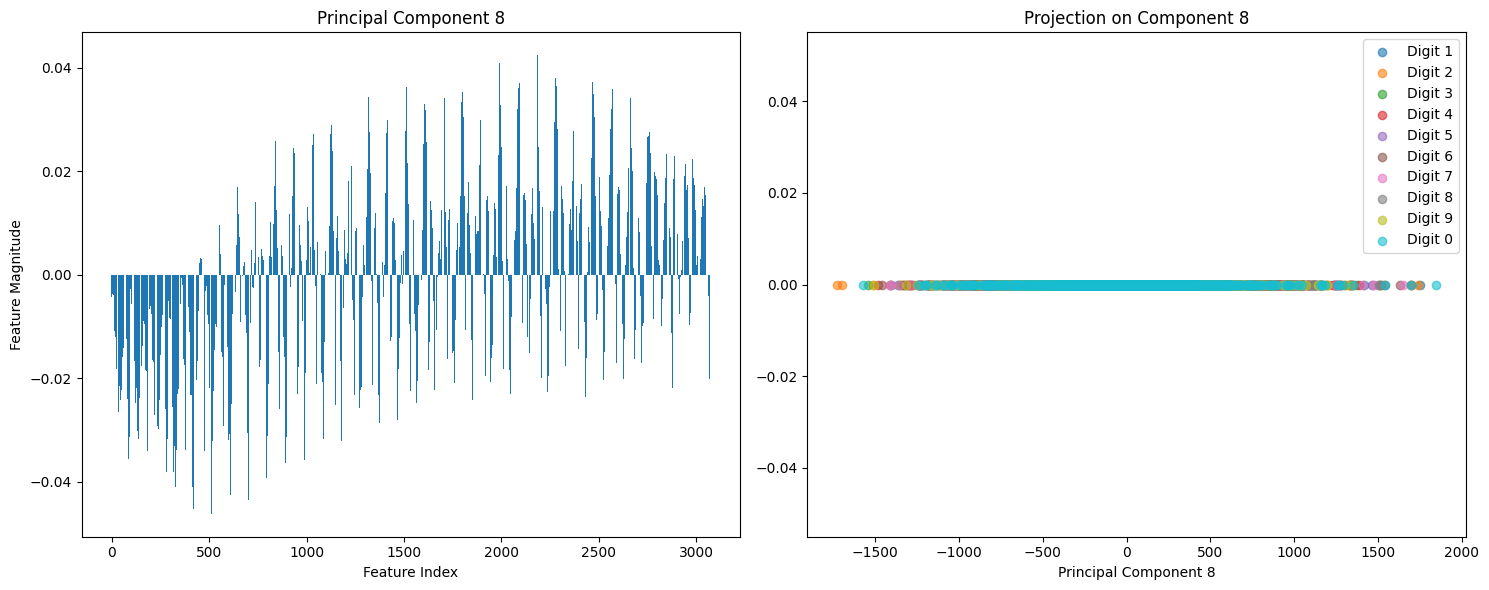

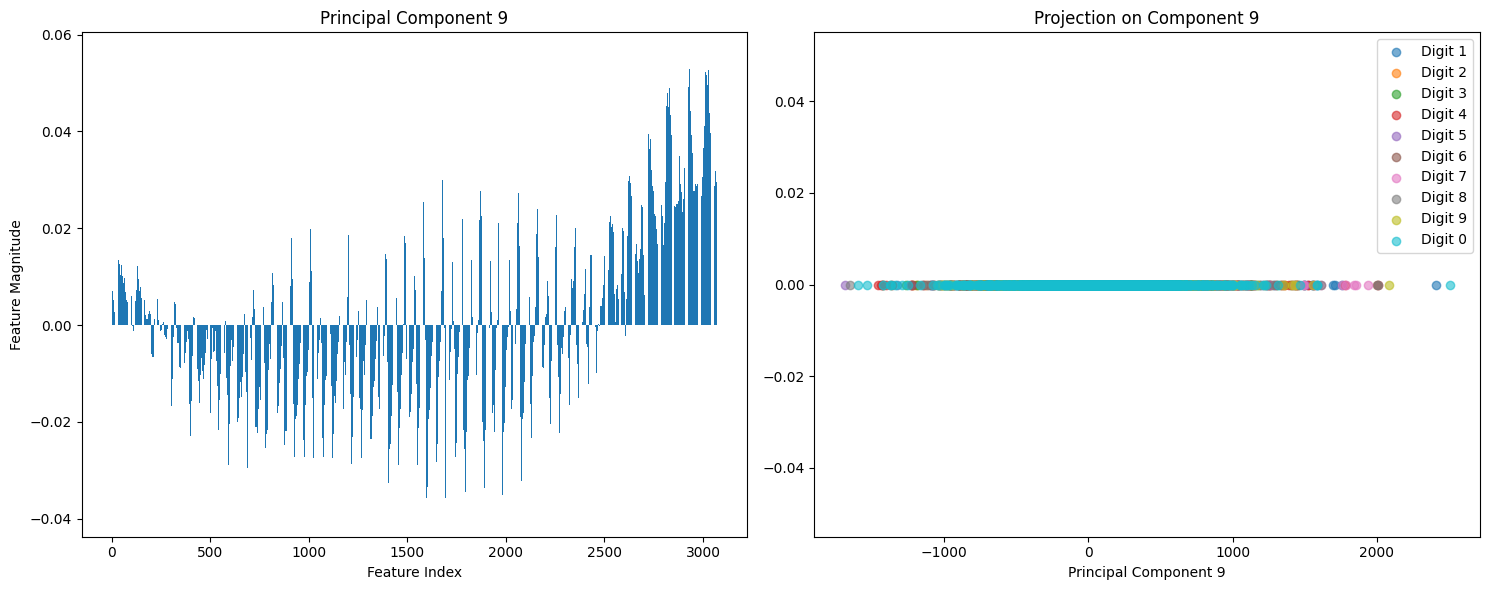

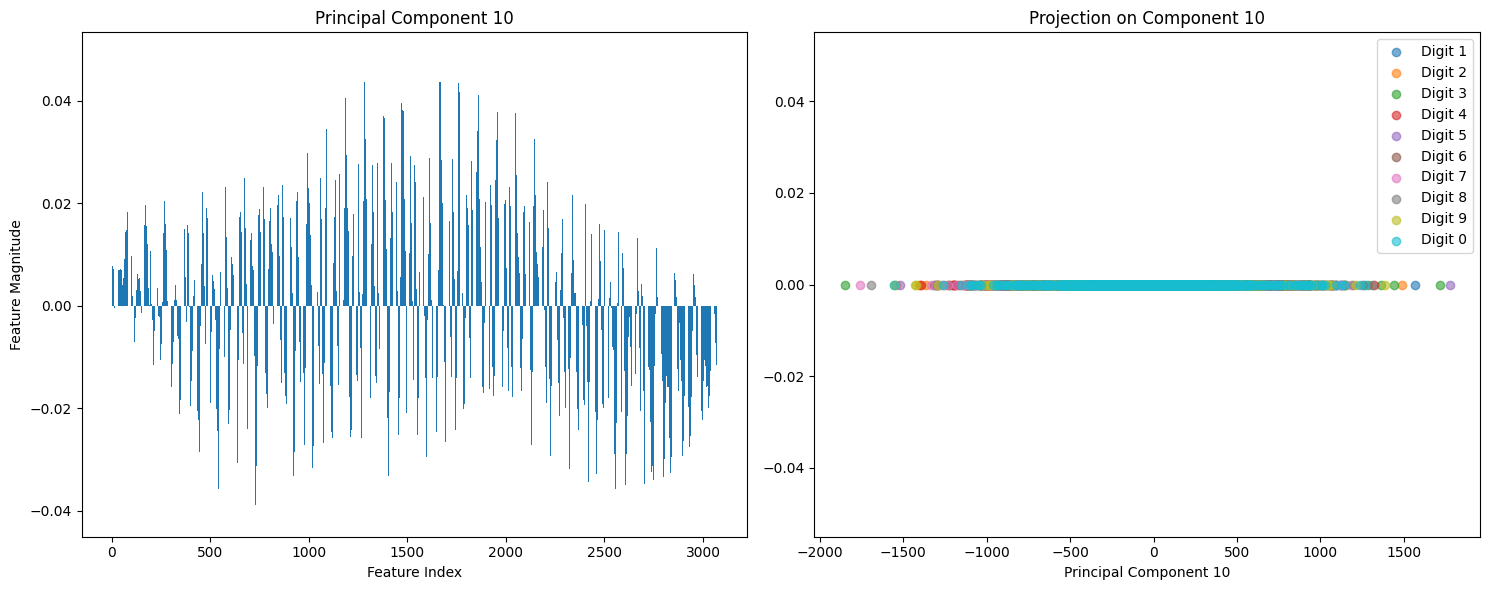

In [14]:
# for visualization we are projecting the data points onto the first 10 principal components
components = pca10.components_
for i in range(components.shape[0]):
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the projection on the left subplot
    component_i = components[i]
    projections = X_flat.dot(component_i)
    for label in np.unique(Y):
        indices = np.where(Y == label)[0]
        axes[1].scatter(projections[indices], np.zeros_like(indices), label=f'Digit {(label)%10}', alpha=0.6)
    
    axes[1].set_title(f'Projection on Component {i + 1}')
    axes[1].set_xlabel(f'Principal Component {i + 1}')
    axes[1].legend()

    # Plot the bar graph on the right subplot
    axes[0].bar(range(components.shape[1]), components[i, :])
    axes[0].set_title(f'Principal Component {i + 1}')
    axes[0].set_xlabel(f'Feature Index')
    axes[0].set_ylabel('Feature Magnitude')

    # Adjust layout
    plt.tight_layout()
    
    # Show the combined plot
    plt.show()

<div style="text-align: center;">
    <h3>Get the reconstruted samples from pca inverse and plot them </h3>
</div>

<div style="text-align: center;">
    <h3>Pca with 10 components</h3>
</div>

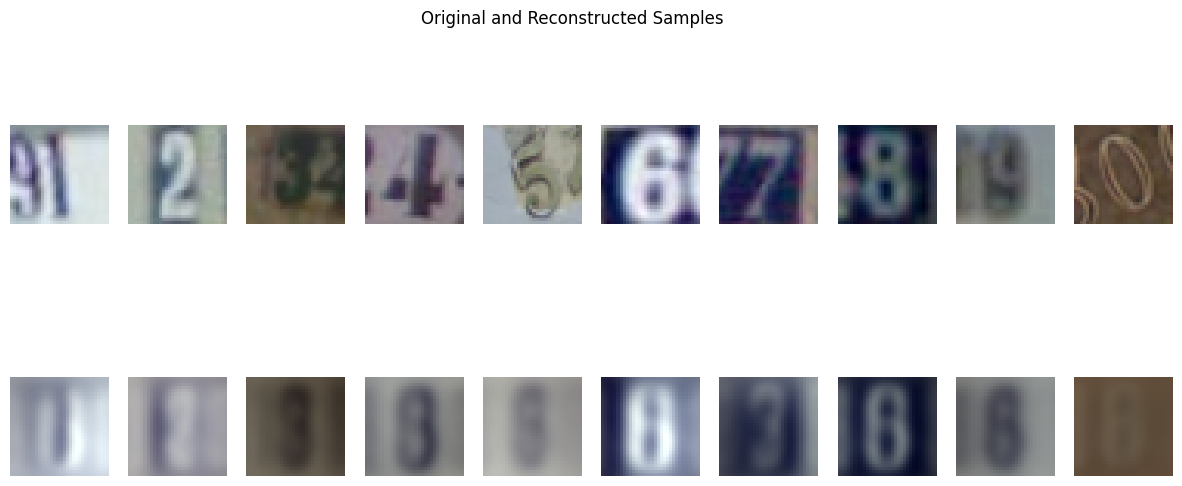

In [15]:

reconstructed_samples = pca10.inverse_transform(X_pca10)

# Visualize the original and reconstructed samples
fig, axes = plt.subplots(2, 10, figsize=(15, 6))
fig.suptitle('Original and Reconstructed Samples')

for i in range(10):
    # Original sample
    axes[0, i].imshow(X[i*2500])
    axes[0, i].axis('off')

    # Reconstructed sample
    axes[1, i].imshow(np.round(np.clip(reconstructed_samples[i*2500].reshape(32, 32, 3)/255.0,0,1)*255).astype(int))
    axes[1, i].axis('off')

plt.show()


<div style="text-align: center;">
    <h3>PCA with 27 components which will lead to POV >0.9 as asked in Q1(a)</h3>
</div>

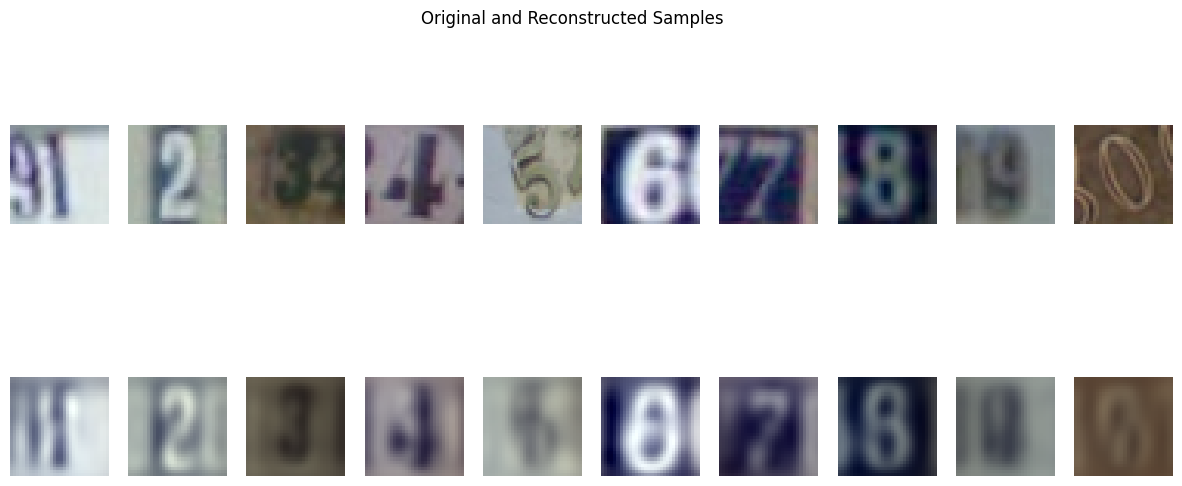

In [16]:

pca27 = PCA(n_components=27)
X_pca27 = pca27.fit_transform(X_flat)
reconstructed_samples = pca27.inverse_transform(X_pca27)


# Visualize the original and reconstructed samples
fig, axes = plt.subplots(2, 10, figsize=(15, 6))
fig.suptitle('Original and Reconstructed Samples')

for i in range(10):
    # Original sample
    axes[0, i].imshow(X[i*2500])
    axes[0, i].axis('off')

    # Reconstructed sample
    axes[1, i].imshow(np.round(np.clip(reconstructed_samples[i*2500].reshape(32, 32, 3)/255.0,0,1)*255).astype(int))
    axes[1, i].axis('off')

plt.show()

<div style="text-align: center;">
    <h3>PCA with 100 components</h3>
</div>

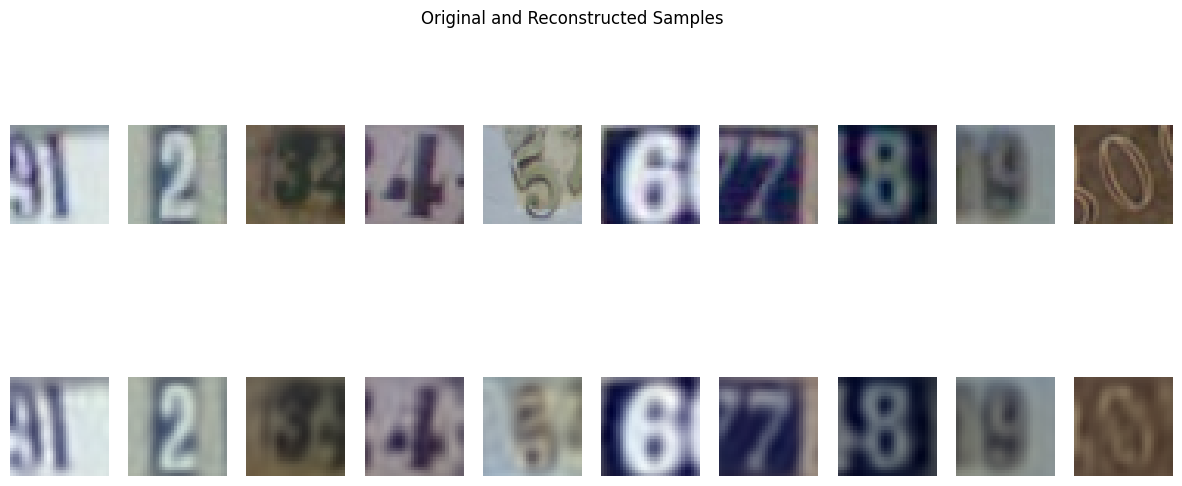

In [17]:
pca100 = PCA(n_components=100)
X_pca100 = pca100.fit_transform(X_flat)
reconstructed_samples = pca100.inverse_transform(X_pca100)


# Visualize the original and reconstructed samples
fig, axes = plt.subplots(2, 10, figsize=(15, 6))
fig.suptitle('Original and Reconstructed Samples')

for i in range(10):
    # Original sample
    axes[0, i].imshow(X[i*2500])
    axes[0, i].axis('off')

    # Reconstructed sample
    axes[1, i].imshow(np.round(np.clip(reconstructed_samples[i*2500].reshape(32, 32, 3)/255.0,0,1)*255).astype(int))
    axes[1, i].axis('off')

plt.show()

<h3><b>Conclusion</b>: By using more components we can retain more information about the variability in the dataset which leads to better reconstruction.</h3>

<div style="text-align: center;">
    <h1>Question 1(c)</h1>
</div>

In [18]:
# Load the contents of the MATLAB file
test_mat_contents = sio.loadmat("test_32x32.mat")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

raw_knn = KNeighborsClassifier(n_neighbors=5)
raw_knn.fit(X_flat,Y)

X_test = np.transpose(test_mat_contents['X'], (3, 0, 1, 2))
Y_test = test_mat_contents['y'][:,0]

# Reshape each image to a one-dimensional array
X_test_flat = X_test.reshape(X_test.shape[0], -1)

raw_pred = raw_knn.predict(X_test_flat)

accuracy_array = []
title_array = []
temp = accuracy_score(Y_test,raw_pred)
accuracy_array.append(temp)
title_array.append('knn k=5 on raw data')
print("Accuracy of Knn with k=5 on raw data is : ",temp)

Accuracy of Knn with k=5 on raw data is :  0.4016979102642901


In [19]:
raw_knn = KNeighborsClassifier(n_neighbors=7)
raw_knn.fit(X_flat,Y)

raw_pred = raw_knn.predict(X_test_flat)
temp=accuracy_score(Y_test,raw_pred)
accuracy_array.append(temp)
title_array.append('knn k=7 on raw data')
print("Accuracy of Knn with k=7 on raw data is : ",temp)

Accuracy of Knn with k=7 on raw data is :  0.4145282728948986


In [20]:
X_pca10_test = pca10.fit_transform(X_test_flat)

pca10_knn = KNeighborsClassifier(n_neighbors=5)
pca10_knn.fit(X_pca10,Y)

pca_pred = pca10_knn.predict(X_pca10_test)
temp=accuracy_score(Y_test,pca_pred)
accuracy_array.append(temp)
title_array.append('knn k=5 on data pca with 10')
print("Accuracy of Knn with k=5 on data pca with 10 is : ",temp)

Accuracy of Knn with k=5 on data pca with 10 is :  0.13802243392747388


In [21]:
pca10_knn = KNeighborsClassifier(n_neighbors=7)
pca10_knn.fit(X_pca10,Y)

pca_pred = pca10_knn.predict(X_pca10_test)
temp=accuracy_score(Y_test,pca_pred)
accuracy_array.append(temp)
title_array.append('knn k=7 on data pca with 10')
print("Accuracy of Knn with k=7 on data pca with 10 is : ",temp)

Accuracy of Knn with k=7 on data pca with 10 is :  0.13314382298709282


In [22]:
X_pca27_test = pca27.fit_transform(X_test_flat)

pca27_knn = KNeighborsClassifier(n_neighbors=5)
pca27_knn.fit(X_pca27,Y)

pca_pred = pca27_knn.predict(X_pca27_test)
temp=accuracy_score(Y_test,pca_pred)
accuracy_array.append(temp)
title_array.append('knn k=5 on data pca with 27')
print("Accuracy of Knn with k=5 on data pca with 27 is : ",temp)

Accuracy of Knn with k=5 on data pca with 27 is :  0.15296558082360173


In [23]:
X_pca27_test = pca27.fit_transform(X_test_flat)

pca27_knn = KNeighborsClassifier(n_neighbors=7)
pca27_knn.fit(X_pca27,Y)

pca_pred = pca27_knn.predict(X_pca27_test)
temp=accuracy_score(Y_test,pca_pred)
accuracy_array.append(temp)
title_array.append('knn k=7 on data pca with 27')
print("Accuracy of Knn with k=7 on data pca with 10 is : ",temp)

Accuracy of Knn with k=7 on data pca with 10 is :  0.15296558082360173


In [24]:
#show a table of accuracies
import pandas as pd
df = pd.DataFrame({'Accuracy': accuracy_array}, index=title_array)
df

,Accuracy
knn k=5 on raw data,0.401698
knn k=7 on raw data,0.414528
knn k=5 on data pca with 10,0.138022
knn k=7 on data pca with 10,0.133144
knn k=5 on data pca with 27,0.152966
knn k=7 on data pca with 27,0.152966


<h3>Observations:</h3>
<div>
<ul>
<li>The K-Nearest Neighbors (KNN) algorithm with k=5 and k=7 performs better on raw data than on data processed with Principal Component Analysis (PCA).
 </li> 
 <li>The accuracy of KNN decreases when PCA is applied to the data. This suggests that PCA might be removing some important features that are useful for classification.
</li>
<li> The accuracy is slightly higher for k=7 than for k=5 on raw data, indicating that considering more neighbors could lead to better results in this case.
 </li>
 <li>
 The accuracy is increased when number of components is increased from 10 to 27. This is because we are retaining more information about the variability in the dataset which leads to better reconstruction.
 </li>
</ul>
</div>

<div style="text-align: center;">
    <h1>Question 2(a)</h1>
</div>
Perform kmeans clustering with k=10 on the raw data and on data obtained after PCA dimensionality reduction for dimension as found in question1(a) and for dimension 10 as in question1(b).You may use only training data of SVHN to perform this.Do you observe images from the same class to be clustered together?For each cluster,provide the image closest tothe centroid.

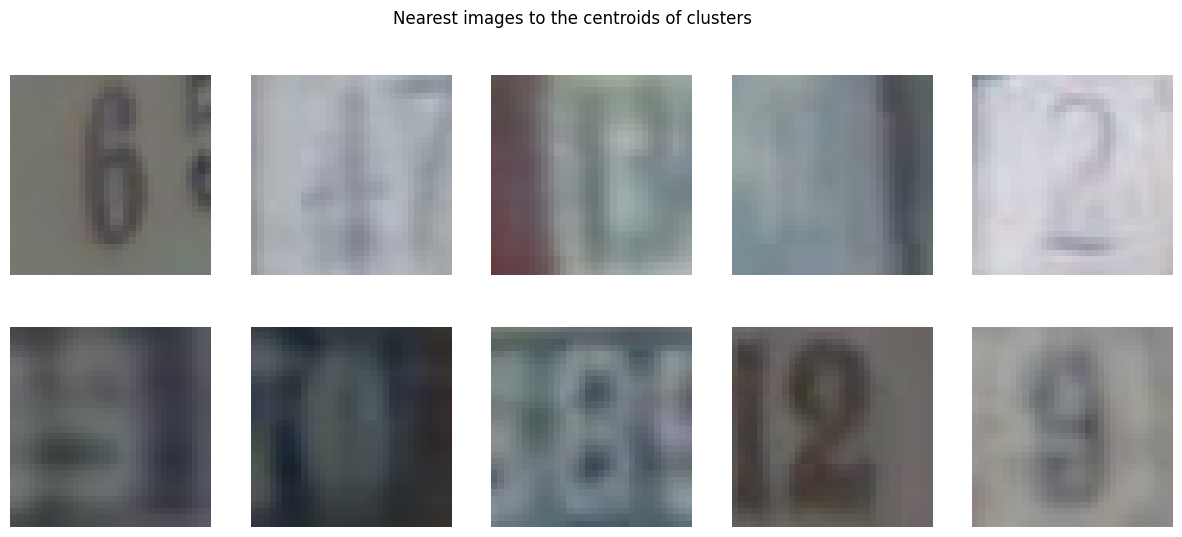

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

kmeans_raw = KMeans(n_clusters=10, n_init=10,random_state=42)
kmeans_raw.fit(X_flat)

fig, axes = plt.subplots(2,5,figsize=(15,6))
fig.suptitle('Nearest images to the centroids of clusters')
for i in range(10):
    #find the image that is closest to the centriod
    closest = pairwise_distances_argmin_min(kmeans_raw.cluster_centers_[i].reshape(1,-1),X_flat)
    
    row_index = i // 5
    column_index = i%5
    axes[row_index,column_index].imshow(X[closest[0][0]])
    axes[row_index,column_index].axis('off')

Cluster  0 : [390 382 366 387 385 377 394 403 404 397]
Cluster  1 : [265 304 273 286 280 268 291 262 272 281]
Cluster  2 : [206 146 128  96  89  73  92  79  83  21]
Cluster  3 : [ 98  97 105 106 109 144 137 144 118 179]
Cluster  4 : [137 144 147 149 129 154 133 118 116 142]
Cluster  5 : [301 299 342 308 335 342 305 341 387 346]
Cluster  6 : [288 267 288 268 292 287 324 268 274 235]
Cluster  7 : [222 174 197 242 198 163 184 241 208 207]
Cluster  8 : [331 349 348 308 332 347 315 312 297 337]
Cluster  9 : [262 338 306 350 351 345 325 332 341 355]


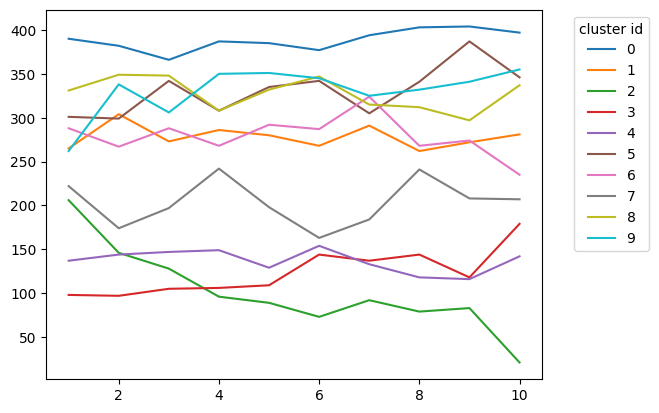

In [26]:
# For each cluster print an array which contains no of images of each class in that cluster
for i in range(10):
    print("Cluster ",i, ":",np.unique(Y[kmeans_raw.labels_ == i],return_counts=True)[1])

# plot a graph which indicates each cluster and the number of images of each class in that cluster
for i in range(10):
    plt.plot([1 ,2 ,3 ,4, 5,6, 7,8,9,10],np.unique(Y[kmeans_raw.labels_ == i],return_counts=True)[1])

#add legend to the graph with cluster id liken "cluster id"
plt.legend(np.arange(0,10),title="cluster id",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



<h3>Observations:<h3>
<div>
<ul>
<li>No, Not all images of same class are clustered together But they are distributed among the clusters and For a given class there exist a cluster which has slightly more images of that class in it than other clusters</li>
<ul>
</div>

<div style="text-align: center;">
    <h2>PCA 10</h2>
</div>

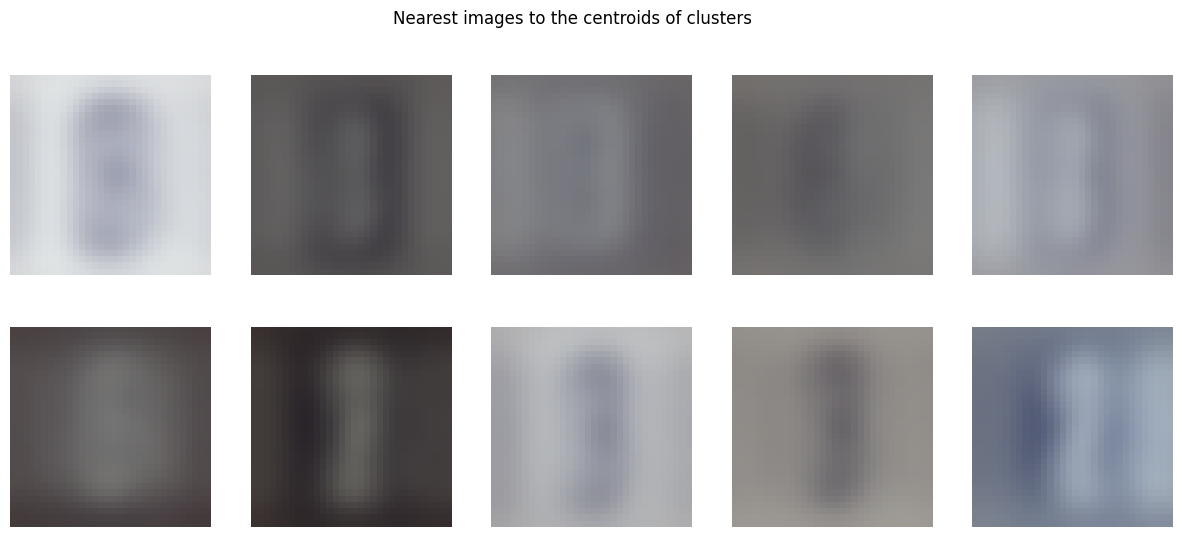

In [27]:

kmeans_pca10 = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans_pca10.fit(X_pca10)

fig, axes = plt.subplots(2,5,figsize=(15,6))
fig.suptitle('Nearest images to the centroids of clusters')
for i in range(10):
    closest = pairwise_distances_argmin_min(kmeans_pca10.cluster_centers_[i].reshape(1,-1),X_pca10)
    image_inverse = pca10.inverse_transform(X_pca10[closest[0][0]])
    
    row_index = i // 5
    column_index = i%5

    axes[row_index,column_index].imshow(np.round(image_inverse.reshape(32, 32, 3)).astype(int))
    axes[row_index,column_index].axis('off')


Cluster  0 : [128 130 137 147 124 144 127 106 109 134]
Cluster  1 : [318 329 332 311 336 343 320 311 282 348]
Cluster  2 : [210 187 207 224 229 193 232 249 219 290]
Cluster  3 : [364 357 362 365 353 371 358 412 416 387]
Cluster  4 : [136 144 122 139 115 152 151 151 128 180]
Cluster  5 : [351 321 348 328 331 327 303 329 387 301]
Cluster  6 : [285 267 296 266 303 297 328 281 287 239]
Cluster  7 : [211 255 230 233 241 227 242 227 220 222]
Cluster  8 : [275 350 323 369 367 356 342 343 352 357]
Cluster  9 : [222 160 143 118 101  90  97  91 100  42]


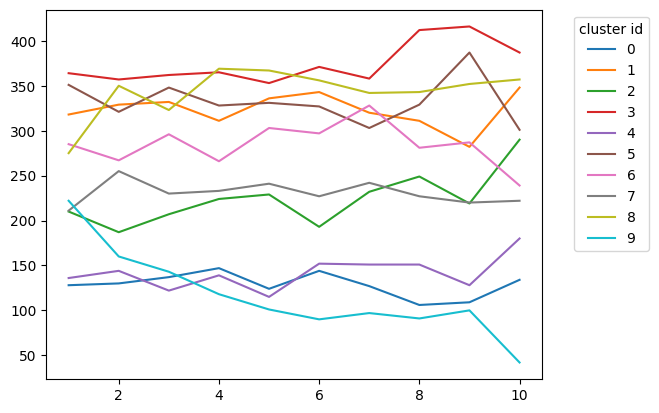

In [28]:
# For each cluster print an array which contains no of images of each class in that cluster
for i in range(10):
    print("Cluster ",i, ":",np.unique(Y[kmeans_pca10.labels_ == i],return_counts=True)[1])

# plot a graph which indicates each cluster and the number of images of each class in that cluster
for i in range(10):
    plt.plot([1 ,2 ,3 ,4, 5,6, 7,8,9,10],np.unique(Y[kmeans_pca10.labels_ == i],return_counts=True)[1])

#add legend to the graph with cluster id liken "cluster id"
plt.legend(np.arange(0,10),title="cluster id",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h3>Observations:<h3>
<div>
<ul>
<li>Here also same as raw data ,Not all images of same class are clustered together But they are distributed among the clusters and For a given class there exist a cluster which has slightly more images of that class in it than other clusters</li>
<ul>
</div>

<div style="text-align: center;">
    <h2>PCA POV>0.9</h2>
</div>

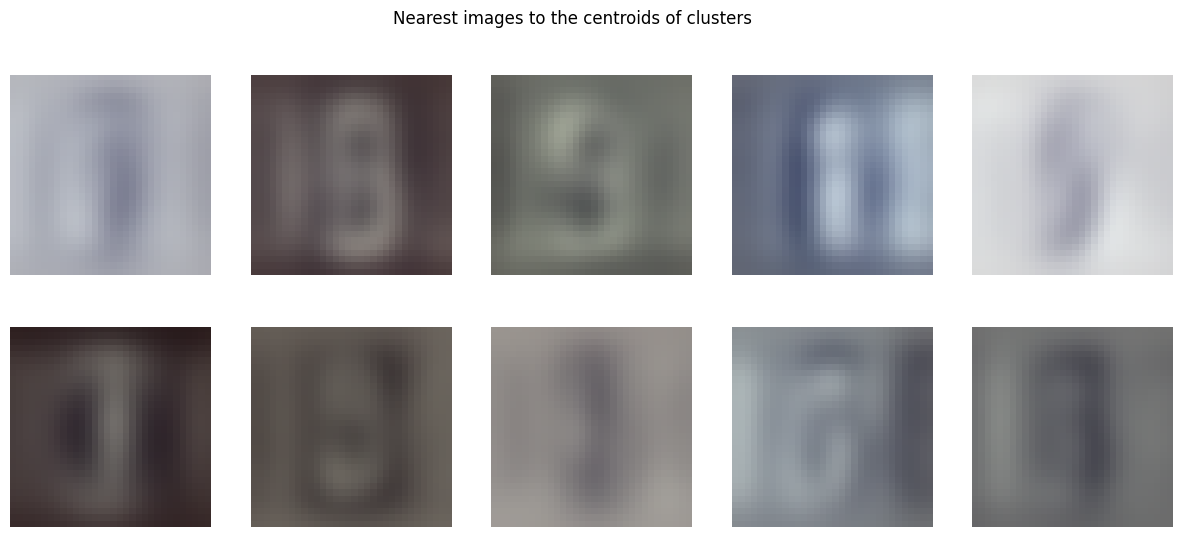

In [29]:
kmeans_pca27 = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans_pca27.fit(X_pca27)

fig, axes = plt.subplots(2,5,figsize=(15,6))
fig.suptitle('Nearest images to the centroids of clusters')
for i in range(10):
    closest = pairwise_distances_argmin_min(kmeans_pca27.cluster_centers_[i].reshape(1,-1),X_pca27)
    image_inverse = pca27.inverse_transform(X_pca27[closest[0][0]])
    
    row_index = i // 5
    column_index = i%5

    axes[row_index,column_index].imshow(np.round(image_inverse.reshape(32, 32, 3)).astype(int))
    axes[row_index,column_index].axis('off')

Cluster  0 : [265 302 272 288 280 270 295 264 273 286]
Cluster  1 : [304 305 343 310 331 339 303 340 383 333]
Cluster  2 : [223 174 196 243 198 161 186 242 206 209]
Cluster  3 : [207 146 125  95  87  71  94  73  84  21]
Cluster  4 : [137 144 147 149 129 154 133 118 116 142]
Cluster  5 : [286 264 284 264 289 286 318 258 271 235]
Cluster  6 : [329 343 344 306 335 340 318 315 296 343]
Cluster  7 : [264 344 316 358 357 353 326 332 345 357]
Cluster  8 : [ 97  96 105 101 113 145 136 148 121 175]
Cluster  9 : [388 382 368 386 381 381 391 410 405 399]


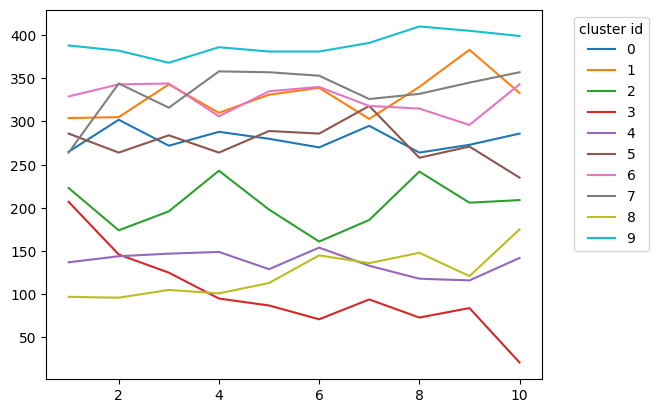

In [30]:
# For each cluster print an array which contains no of images of each class in that cluster
for i in range(10):
    print("Cluster ",i, ":",np.unique(Y[kmeans_pca27.labels_ == i],return_counts=True)[1])

# plot a graph which indicates each cluster and the number of images of each class in that cluster
for i in range(10):
    plt.plot([1 ,2 ,3 ,4, 5,6, 7,8,9,10],np.unique(Y[kmeans_pca27.labels_ == i],return_counts=True)[1])

#add legend to the graph with cluster id liken "cluster id"
plt.legend(np.arange(0,10),title="cluster id",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h3>Observations:<h3>
<div>
<ul>
<li>Here also same as raw data ,Not all images of same class are clustered together But they are distributed among the clusters and For a given class there exist a cluster which has slightly more images of that class in it than other clusters</li>
<ul>
</div>

<div style="text-align: center;">
    <h2>PCA 100</h2>
</div>

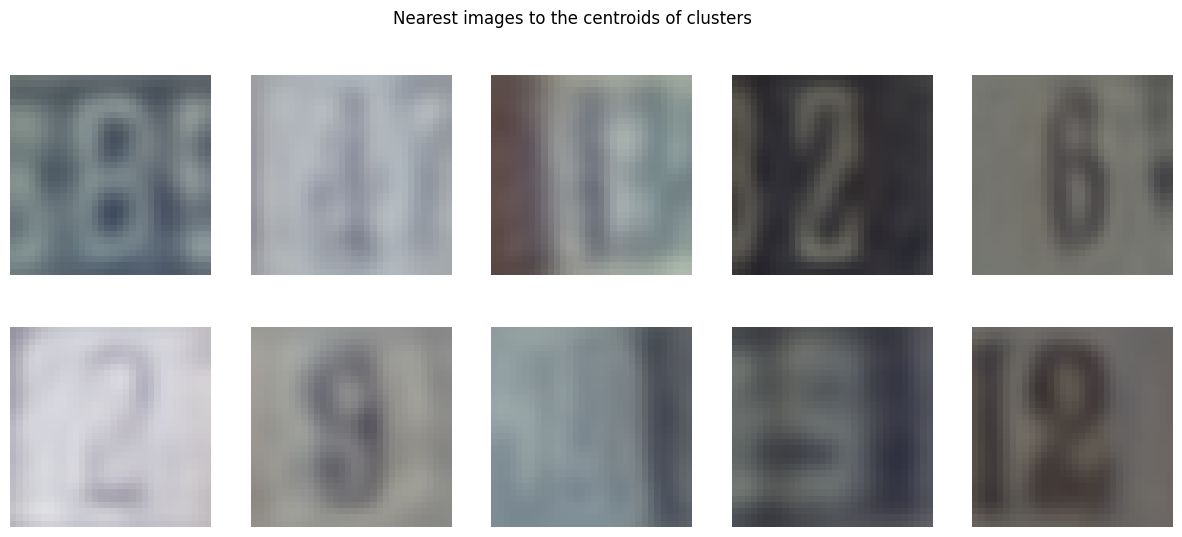

In [31]:
kmeans_pca100 = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans_pca100.fit(X_pca100)

fig, axes = plt.subplots(2,5,figsize=(15,6))
fig.suptitle('Nearest images to the centroids of clusters')
for i in range(10):
    closest = pairwise_distances_argmin_min(kmeans_pca100.cluster_centers_[i].reshape(1,-1),X_pca100)
    image_inverse = pca100.inverse_transform(X_pca100[closest[0][0]])
    
    row_index = i // 5
    column_index = i%5

    axes[row_index,column_index].imshow(np.round(image_inverse.reshape(32, 32, 3)).astype(int))
    axes[row_index,column_index].axis('off')

Cluster  0 : [128 130 137 147 124 144 127 106 109 134]
Cluster  1 : [318 329 332 311 336 343 320 311 282 348]
Cluster  2 : [210 187 207 224 229 193 232 249 219 290]
Cluster  3 : [364 357 362 365 353 371 358 412 416 387]
Cluster  4 : [136 144 122 139 115 152 151 151 128 180]
Cluster  5 : [351 321 348 328 331 327 303 329 387 301]
Cluster  6 : [285 267 296 266 303 297 328 281 287 239]
Cluster  7 : [211 255 230 233 241 227 242 227 220 222]
Cluster  8 : [275 350 323 369 367 356 342 343 352 357]
Cluster  9 : [222 160 143 118 101  90  97  91 100  42]


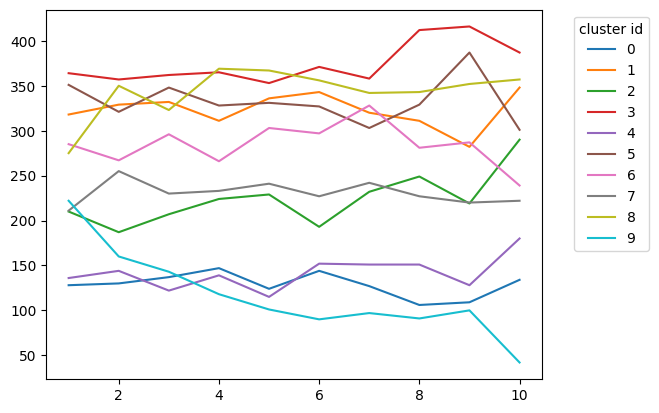

In [32]:
# For each cluster print an array which contains no of images of each class in that cluster
for i in range(10):
    print("Cluster ",i, ":",np.unique(Y[kmeans_pca10.labels_ == i],return_counts=True)[1])

# plot a graph which indicates each cluster and the number of images of each class in that cluster
for i in range(10):
    plt.plot([1 ,2 ,3 ,4, 5,6, 7,8,9,10],np.unique(Y[kmeans_pca10.labels_ == i],return_counts=True)[1])

#add legend to the graph with cluster id liken "cluster id"
plt.legend(np.arange(0,10),title="cluster id",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h3>Observations:<h3>
<div>
<ul>
<li>Here also same as raw data ,Not all images of same class are clustered together But they are distributed among the clusters and For a given class there exist a cluster which has slightly more images of that class in it than other clusters</li>
<ul>
</div>

<div style="text-align: center;">
    <h1>Question 2(b)</h1>
</div>
Find the sum squared error for each of these different clustering obtained in 2(a).Make use of the label information associated with the images to evaluate your clustering. Specifically, evaluate the goodness of your clusters for various cases in 2(a) by using two evaluation metrics purity and rand-index.

Sum squared Error

In [33]:
# Find sums of squared distances of samples to their closest cluster center.
#for raw data
print("The sum squared error for k-means with raw data: ",kmeans_raw.inertia_)
# for pca10
print("The sum squared error for k-means with pca with 10 components: ",kmeans_pca10.inertia_)
# for pca27
print("The sum squared error for k-means with pca with 27 components: ",kmeans_pca27.inertia_)

The sum squared error for k-means with raw data:  80646616397.96791
The sum squared error for k-means with pca with 10 components:  45546088172.684494
The sum squared error for k-means with pca with 27 components:  61441310132.73388


In [34]:
#find purity and rand-index for each above cases
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

#def purity
#purity is the number of correct labels in a cluster divided by the number of data points in that cluster
def purity_score(y_true, y_pred):
    # confusion matrix is a crosstab between y_true and y_pred
    contingency_matrix = confusion_matrix(y_true, y_pred)
    # np.amax is used to find the maximum value in each column of the contingency matrix and it's count is summed up
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


#raw data
print("for raw data")
print("Purity ",purity_score(Y,kmeans_raw.labels_))
print("Rand-score",adjusted_rand_score(Y,kmeans_raw.labels_))
print("\n\n")

#pca10
print("for pca10")
print("Purity ",purity_score(Y,kmeans_pca10.labels_))
print("Rand-score ",adjusted_rand_score(Y,kmeans_pca10.labels_))
print("\n\n")


#pca27
print("for pca27")
print("Purity ",purity_score(Y,kmeans_pca27.labels_))
print("Rand-score",adjusted_rand_score(Y,kmeans_pca27.labels_))
print("\n\n")

for raw data
Purity  0.11616
Rand-score 0.0006794618914962252



for pca10
Purity  0.11768
Rand-score  0.0006925910784482301



for pca27
Purity  0.11576
Rand-score 0.0006681964820763298





<div style="text-align: center;">
    <h1>Question 2(c)</h1>
</div>
If you label each cluster with the digit that occurs most frequently within it, then what is your classification accuracy with this unsupervised method for various cases? How does this compare with the accuracy you got with the K-NN classifier in Q1(c)?

In [35]:
#label each cluster with the most common label in that cluster and calculate accuracy

#raw data
Y_predict = np.zeros_like(Y)
for i in range(10):
    cluster = np.where(kmeans_raw.labels_ == i)[0]
    label = Y[cluster]
    most_common_label = np.bincount(label).argmax()
    Y_predict[cluster] = most_common_label

print("for raw data ",accuracy_score(Y,Y_predict))

#pca10
Y_predict = np.zeros_like(Y)
for i in range(10):
    cluster = np.where(kmeans_pca10.labels_ == i)[0]
    label = Y[cluster]
    most_common_label = np.bincount(label).argmax()
    Y_predict[cluster] = most_common_label
print("for pca10 ",accuracy_score(Y,Y_predict))


#pca27
Y_predict = np.zeros_like(Y)
for i in range(10):
    cluster = np.where(kmeans_pca27.labels_ == i)[0]
    label = Y[cluster]
    most_common_label = np.bincount(label).argmax()
    Y_predict[cluster] = most_common_label
print("for pca27 ",accuracy_score(Y,Y_predict))

df


for raw data  0.11616
for pca10  0.11768
for pca27  0.11576


,Accuracy
knn k=5 on raw data,0.401698
knn k=7 on raw data,0.414528
knn k=5 on data pca with 10,0.138022
knn k=7 on data pca with 10,0.133144
knn k=5 on data pca with 27,0.152966
knn k=7 on data pca with 27,0.152966


<h3>Observations:</h3>
<div>
<ul>
<li>
The accuracy for clustering is relatively lower than k-NN suggesting that the clusters do not align well with true labels.</li>
<li>k-NN classification outperformed clustering this scenario especially when using raw data.</li>
<li>The reduction in dimensionality through PCA appears to have a negative impact on both clustering and k-NN classification accuracy. More features (raw data) seems to work better for this classification task.</li>
<ul>
</div>


<div style="text-align: center;">
    <h1>Question 2(d)</h1>
</div>

Perform k-means clustering with k=5 on data obtained after PCA dimensionality reduction for dimension as found in question 1(a). Find the sum squared error for each of these cases. Do you observe images from different classes to be clustered together? Which all classes do you find are getting clustered together?







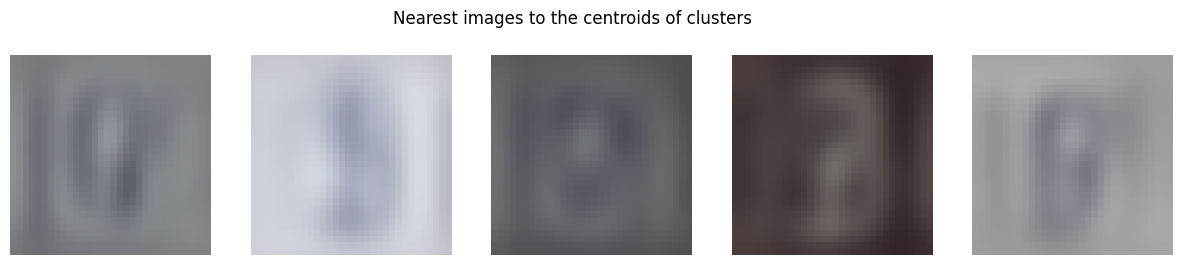

In [36]:
kmeans_pca27 = KMeans(n_clusters=5, n_init=5, random_state=42)
kmeans_pca27.fit(X_pca27)
fig, axes = plt.subplots(1,5,figsize=(15,3))
fig.suptitle('Nearest images to the centroids of clusters')
for i in range(5):
    closest = pairwise_distances_argmin_min(kmeans_pca27.cluster_centers_[i].reshape(1,-1),X_pca27)
    image_inverse = pca27.inverse_transform(X_pca27[closest[0][0]])

    column_index = i%5

    axes[column_index].imshow(np.round(image_inverse.reshape(32, 32, 3)).astype(int))
    axes[column_index].axis('off')

In [37]:
# Find sums of squared distances of samples to their closest cluster center.
# for pca27
print("The sum squared error for k-means with pca27 with k=5: ",kmeans_pca27.inertia_)

The sum squared error for k-means with pca27 with k=5:  71392979642.56659


Cluster  0 : [633 612 621 666 636 637 651 693 670 662]
Cluster  1 : [191 212 211 230 188 232 190 186 181 214]
Cluster  2 : [762 717 748 704 714 710 679 741 755 728]
Cluster  3 : [465 441 483 453 505 473 519 445 463 433]
Cluster  4 : [449 518 437 447 457 448 461 435 431 463]


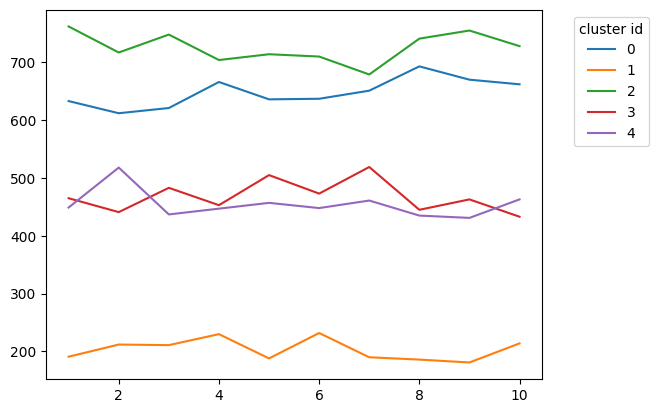

In [38]:
# For each cluster print an array which contains no of images of each class in that cluster
for i in range(5):
    print("Cluster ",i, ":",np.unique(Y[kmeans_pca27.labels_ == i],return_counts=True)[1])

# plot a graph which indicates each cluster and the number of images of each class in that cluster
for i in range(5):
    plt.plot([1 ,2 ,3 ,4, 5,6, 7,8,9,10],np.unique(Y[kmeans_pca27.labels_ == i],return_counts=True)[1])

#add legend to the graph with cluster id liken "cluster id"
plt.legend(np.arange(0,5),title="cluster id",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h3>Observations:</h3>
<div>
<ul>
<li>For each cluster, the frequencies of samples from classes 1 to 10 are similar.</li>
<li>No specific class overwhelmingly dominates any cluster.</li>
<li>Images from different classes are indeed clustered together, but there isn't a clear pattern of one or a few classes dominating a particular cluster.</li>
</ul>
</div>
It seems like the clustering algorithm has distributed the samples almost evenly across different classes within each cluster. If there were a strong pattern of certain classes being predominantly present in specific clusters, it would indicate a more class-specific and structured clustering.